<font size='8'>Exploratory Data Analysis

<font size='4'>Analysis on Terrorism by Brillia Benny

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<font size='5'>Input Data

In [2]:
data=pd.read_csv(r'C:\Users\Brillia\Documents\Personal\globalterrorismdb_0718dist.csv')
data.head()

C:\Users\Brillia\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


<font size='5'>Data Cleaning

In [3]:
data.shape

(181691, 135)

In [4]:
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [5]:
#dropping unwanted colums
data.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound', 'gname' : 'Name'},inplace=True)
data=data[['Year','Month','day','Country','State','Region','City','latitude','longitude',"Attacktype",'kill',
               'Wound','target1','summary','Targettype','Weapon','motive', 'Name']]
data.head(10)

,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,summary,Targettype,Weapon,motive,Name
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,Private Citizens & Property,Unknown,NaN,MANO-D
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,Government (Diplomatic),Unknown,NaN,23rd of September Communist League
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Journalists & Media,Unknown,NaN,Unknown
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Government (Diplomatic),Explosives,NaN,Unknown
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Government (Diplomatic),Incendiary,NaN,Unknown
5,1970,1,1,United States,Illinois,North America,Cairo,37.005105,-89.176269,Armed Assault,0.0,0.0,Cairo Police Headquarters,1/1/1970: Unknown African American assailants ...,Police,Firearms,To protest the Cairo Illinois Police Deparment,Black Nationalists
6,1970,1,2,Uruguay,Montevideo,South America,Montevideo,-34.891151,-56.187214,Assassination,0.0,0.0,Juan Maria de Lucah/Chief of Directorate of in...,NaN,Police,Firearms,NaN,Tupamaros (Uruguay)
7,1970,1,2,United States,California,North America,Oakland,37.791927,-122.225906,Bombing/Explosion,0.0,0.0,Edes Substation,1/2/1970: Unknown perpetrators detonated explo...,Utilities,Explosives,NaN,Unknown
8,1970,1,2,United States,Wisconsin,North America,Madison,43.076592,-89.412488,Facility/Infrastructure Attack,0.0,0.0,"R.O.T.C. offices at University of Wisconsin, M...","1/2/1970: Karl Armstrong, a member of the New ...",Military,Incendiary,To protest the War in Vietnam and the draft,New Year's Gang
9,1970,1,3,United States,Wisconsin,North America,Madison,43.072950,-89.386694,Facility/Infrastructure Attack,0.0,0.0,Selective Service Headquarters in Madison Wisc...,"1/3/1970: Karl Armstrong, a member of the New ...",Government (General),Incendiary,To protest the War in Vietnam and the draft,New Year's Gang


In [6]:
data.shape

(181691, 18)

<font size='5'>Visualization

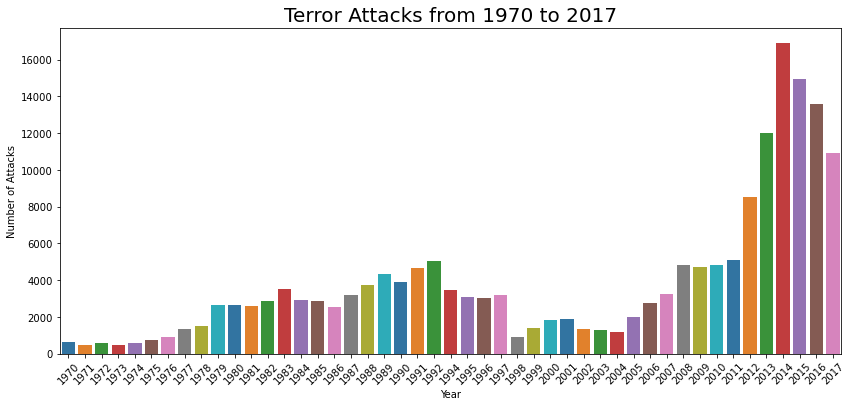

In [54]:
yr = data['Year'].unique()
yr_count = data['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (14,6))
sns.barplot(x = yr,y = yr_count,palette = "tab10")
plt.xticks(rotation = 45)
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Terror Attacks from 1970 to 2017',fontsize='20')
plt.show()

<font size='4'>Highest number of terrorist attacks occured in 2014.

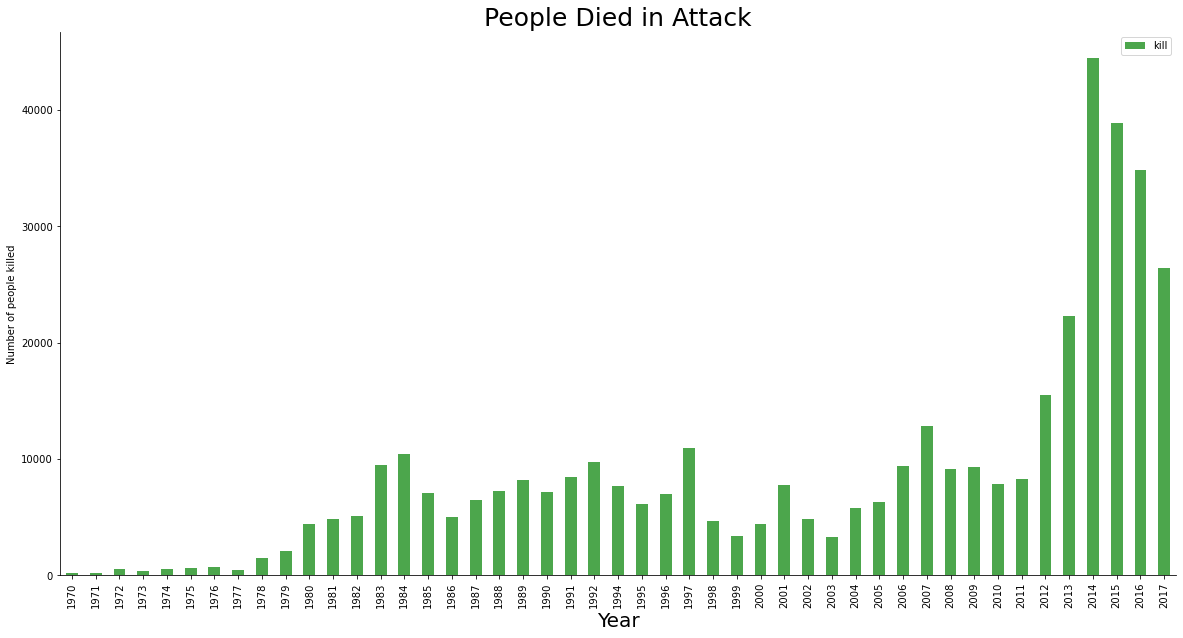

In [42]:
d= data[['Year','kill']].groupby(['Year']).sum()
fig, ax4 = plt.subplots(figsize=(20,10))
d.plot(kind='bar',alpha=0.7,ax=ax4,color='green')
plt.title('People Died in Attack',fontsize=25)
plt.ylabel('Number of people killed')
plt.xlabel('Year',fontsize=20)
top_side = ax4.spines["top"]
top_side.set_visible(False)
right_side = ax4.spines["right"]
right_side.set_visible(False)   

<font size='4'>The number of people died in a terrorist attack was highest in 2014.

<font size='5'>Most affected Countries

C:\Users\Brillia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


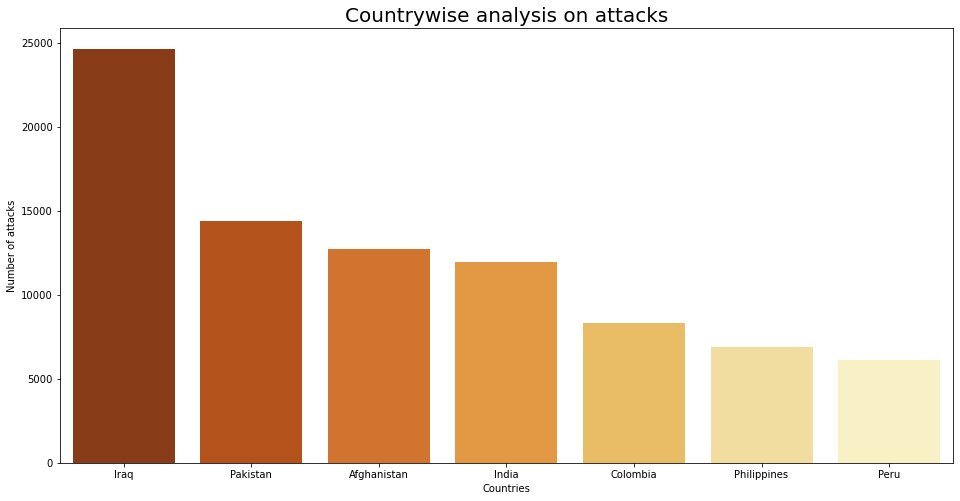

In [35]:
plt.subplots(figsize=(16,8))
sns.barplot(data['Country'].value_counts()[:7].index,data['Country'].value_counts()[:7].values,palette='YlOrBr_r')
plt.title('Countrywise analysis on attacks',fontsize='20')
plt.xlabel('Countries')
plt.ylabel('Number of attacks')
plt.show()

<font size='4'>Iraq has witnessed the maximum attacks.

<font size='5'> Most affected Cities

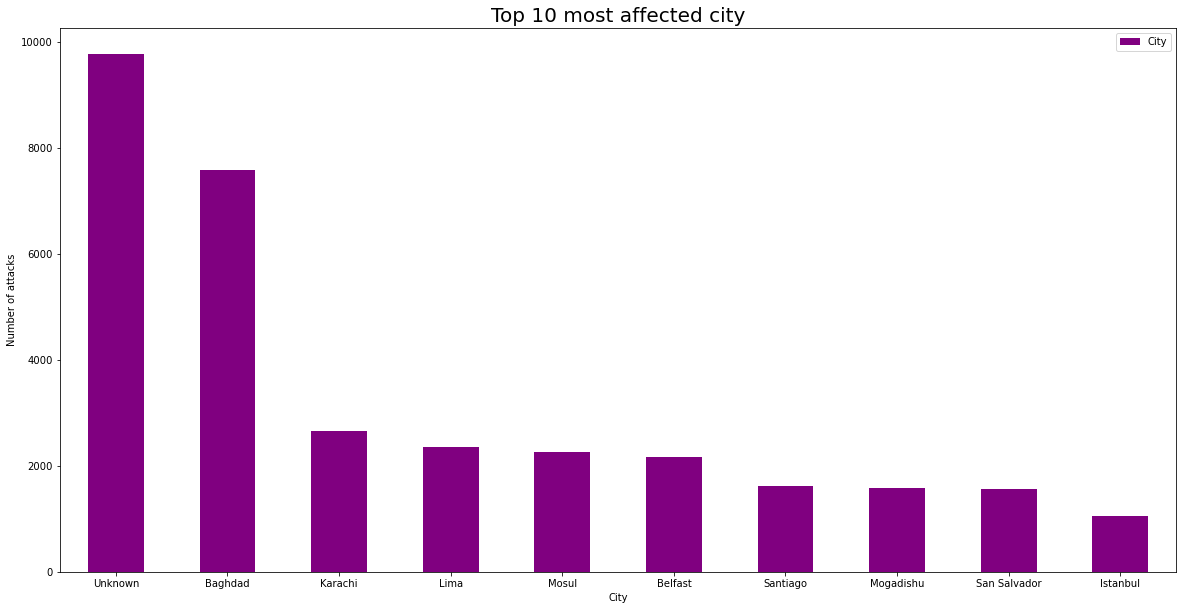

In [55]:
data['City'].value_counts().to_frame().sort_values('City',axis=0,ascending=False).head(10).plot(kind='bar',figsize=(20,10),color='purple')
plt.xticks(rotation = 0)
plt.xlabel("City")
plt.ylabel("Number of attacks")
plt.title("Top 10 most affected city",fontsize=20)
plt.show()

<font size='5'>Most comon mode of attack

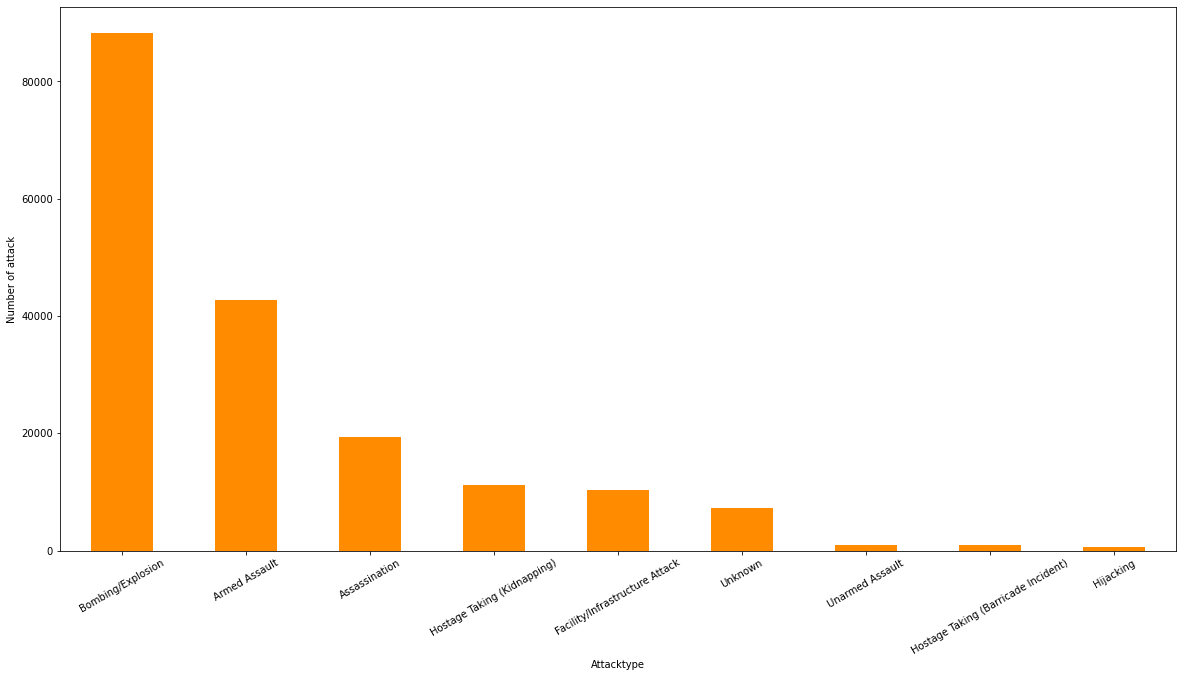

In [71]:
data['Attacktype'].value_counts().plot(kind='bar',figsize=(20,10),color='darkorange')
plt.xticks(rotation = 30)
plt.xlabel("Attacktype")
plt.ylabel("Number of attack")
plt.show()

<font size='4'>Most comonly adopted attack method was Bobming/Explosion.

<font size='5'>People killed in different types of attack

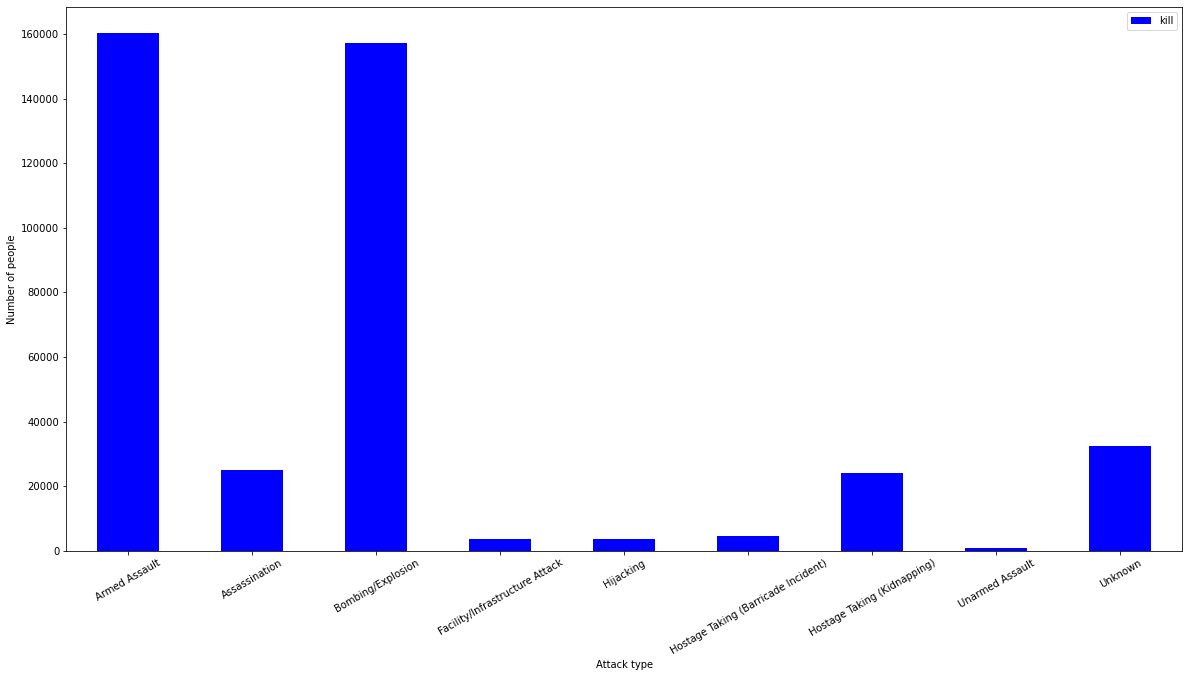

In [66]:
data[['Attacktype','kill']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(20,10),color=['blue'])
plt.xticks(rotation=30)
plt.ylabel('Number of people')
plt.xlabel('Attack type')
plt.show() 

<font size='4'>Most people were killed in an Armed Assault followed by Bombing/Explosion.

<font size='5'>Kind of people targeted each year.

C:\Users\Brillia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


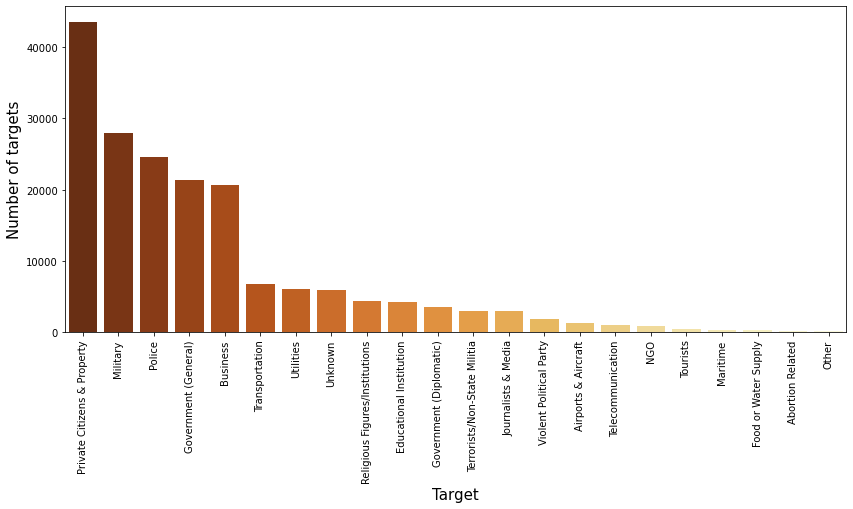

In [79]:
plt.subplots(figsize=(14,6))
sns.countplot(data["Targettype"],order=data['Targettype'].value_counts().index,palette="YlOrBr_r");
plt.xticks(rotation=90)
plt.xlabel("Target",fontsize=15)
plt.ylabel("Number of targets",fontsize=15)
plt.show()

<font size='4'>Most attacked people were Private Citizens and Proprties.

<font size='5'>Organizations behind the attacks

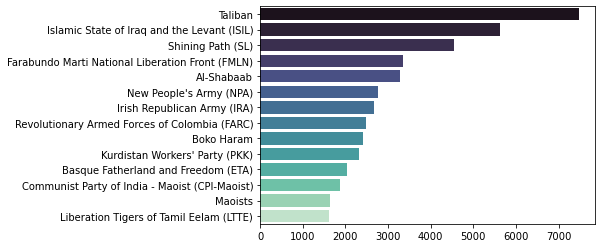

In [91]:
sns.barplot(data['Name'].value_counts()[1:15].values,data['Name'].value_counts()[1:15].index,palette=('mako'))
fig.set_size_inches(20,10)
plt.show()

<font size='4'>Taliban organization is responsible for highest number of attacks.

<font size='5'>_CONCLUSION_

<font size='4'>-Most number of terrorist attacks occured in 2014 and most people died in the same year.

<font size='4'>-Iraq is the hotspot that witnessed maximum attacks.

<font size='4'>-Most attacked city know is Baghdad.

<font size='4'>-Most adopted attack method was Bombing/Explosion.

<font size='4'>-Taliban was behind the maximum number of attacks.

-<font size='4'>There is a noticeable rise in terrorism from 2008 onwards.